In [1]:
import random
import math
import copy


import matplotlib.pyplot as plt

import cv2
from pycocotools.coco import COCO
import os
import numpy as np

import Dataset_final_numpy

In [2]:
def visualize(img_list, anno_list,ids):
    count = 0
    for i, (img, anno,ids) in enumerate(zip(img_list, anno_list,ids)):
        count += 1
        img = cv2.cvtColor(img.astype('uint8'), cv2.COLOR_BGR2RGB)
        for j in range(len(anno)):  # 120
            xltop = int(anno[j][0]) - int(anno[j][2] * 0.5)
            yltop = int(anno[j][1]) + int(anno[j][3] * 0.5)
            xrbot = int(anno[j][0]) + int(anno[j][2] * 0.5)
            yrbot = int(anno[j][1]) - int(anno[j][3] * 0.5)

            cv2.rectangle(img, (xltop, yltop), (xrbot, yrbot), color=(255, 0, 0), thickness=1)
        print("image",count)
        plt.imshow(img)
        plt.savefig("/home/youngsang/work/Training_engine/Image_Test_Final/" + '_' + str(ids) + ".png")
        # if count == 4:
        #     break;
    return img

In [3]:
dataset = Dataset_final_numpy.Dataset(data_dir="/data/image/keti/validate",
                      json_file="/data/image/keti/annotate/instances_validate.json",
                      )
img_list, anno_list, ids, img_infos = dataset.get_dataset()

loading annotations into memory...
Done (t=0.04s)
creating index...
index created!


In [4]:
dataloader = Dataset_final_numpy.Dataloader(batch_size=1,img_list=img_list, anno_list=anno_list, mosaic_scale=(1, 1.5),
                                    rot_degree=90.0, translate=0.5, shear=0.5,
                                    flip=0.5, HSV=0.5,
                                    input_size=(416, 416))

[0]
image 1


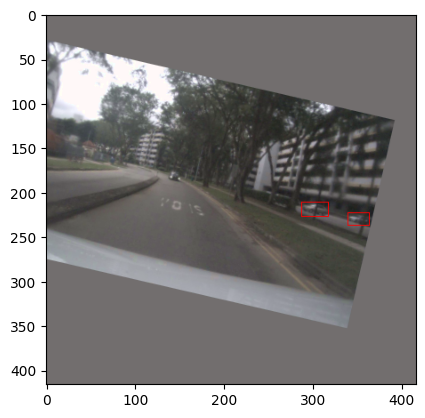

In [10]:
count=0
for batch_img, batch_anno in dataloader:
    count +=1


    visualize(batch_img, batch_anno,ids)
    if count == 1:
        break;